In [1]:
import tensorflow as tf
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

2.16.1


In [2]:
dataset = pd.read_excel('../data/pisos_scaled_data.xlsx', index_col='ID')

dataset_num = pd.read_excel('../data/pisos_datos_numericos.xlsx', index_col='ID')

In [3]:
dataset.shape

(180, 36)

---
---
# En esta versión trataremos de predecir los gastos iniciales

In [4]:
dataset = dataset.drop(['Precio alquiler al año', 'Precio alquiler aplicado al año', 'Gastos generales al año', 'Beneficios totales', 'Beneficios al año'], axis=1)

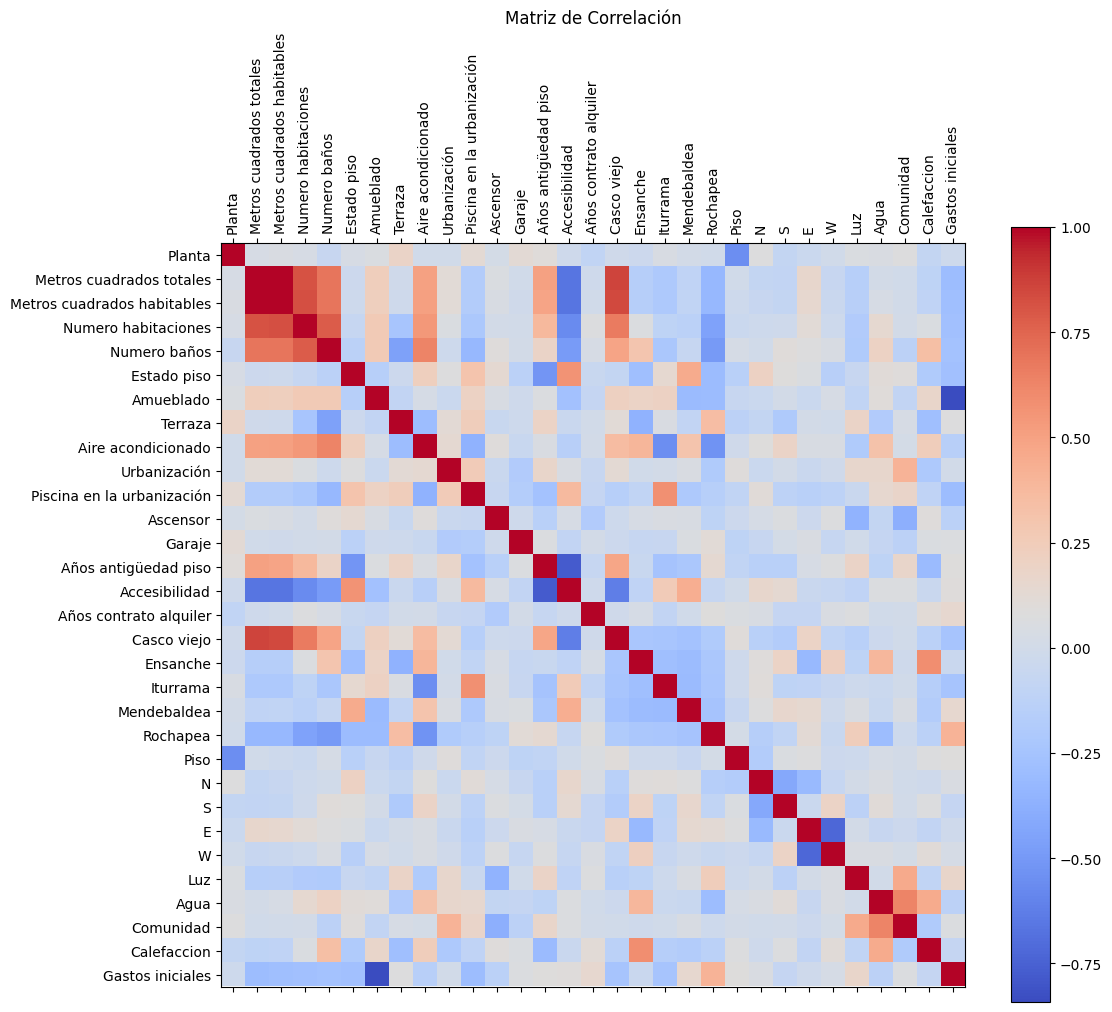

In [5]:
# Calcular la matriz de correlación
correlation_matrix = dataset.corr()

plt.figure(figsize=(12, 10))

# Crear la matriz de correlación
plt.matshow(correlation_matrix, cmap='coolwarm', fignum=1)
plt.colorbar()
plt.title("Matriz de Correlación")

plt.xticks(ticks=range(len(correlation_matrix.columns)), labels=correlation_matrix.columns, rotation=90)
plt.yticks(ticks=range(len(correlation_matrix.columns)), labels=correlation_matrix.columns)

plt.show()

In [6]:
correlation_with_target = correlation_matrix.iloc[-1, :-1]

correlation_with_target

Planta                        -0.022661
Metros cuadrados totales      -0.288371
Metros cuadrados habitables   -0.277704
Numero habitaciones           -0.270373
Numero baños                  -0.258477
Estado piso                   -0.268822
Amueblado                     -0.841575
Terraza                        0.078089
Aire acondicionado            -0.145161
Urbanización                   0.007193
Piscina en la urbanización    -0.292560
Ascensor                      -0.129920
Garaje                         0.059093
Años antigüedad piso           0.082330
Accesibilidad                  0.088938
Años contrato alquiler         0.149167
Casco viejo                   -0.240668
Ensanche                      -0.050273
Iturrama                      -0.243216
Mendebaldea                    0.146513
Rochapea                       0.404672
Piso                           0.080622
N                              0.045091
S                             -0.074371
E                             -0.014308


In [7]:
# Calcular el índice de los elementos ordenados según el valor absoluto
indices_ordenados_abs = correlation_with_target.abs().argsort()[::-1]

# Usar los índices para ordenar la serie original
sort_corr = correlation_with_target.iloc[indices_ordenados_abs]

sort_corr

Amueblado                     -0.841575
Rochapea                       0.404672
Piscina en la urbanización    -0.292560
Metros cuadrados totales      -0.288371
Metros cuadrados habitables   -0.277704
Numero habitaciones           -0.270373
Estado piso                   -0.268822
Numero baños                  -0.258477
Iturrama                      -0.243216
Casco viejo                   -0.240668
Luz                            0.169571
Años contrato alquiler         0.149167
Mendebaldea                    0.146513
Aire acondicionado            -0.145161
Ascensor                      -0.129920
Agua                          -0.123501
Accesibilidad                  0.088938
Años antigüedad piso           0.082330
Piso                           0.080622
Terraza                        0.078089
Calefaccion                   -0.075956
S                             -0.074371
Comunidad                      0.063894
Garaje                         0.059093
Ensanche                      -0.050273


In [8]:
correlation_matrix

,Planta,Metros cuadrados totales,Metros cuadrados habitables,Numero habitaciones,Numero baños,Estado piso,Amueblado,Terraza,Aire acondicionado,Urbanización,Piscina en la urbanización,Ascensor,Garaje,Años antigüedad piso,Accesibilidad,Años contrato alquiler,Casco viejo,Ensanche,Iturrama,Mendebaldea,Rochapea,Piso,N,S,E,W,Luz,Agua,Comunidad,Calefaccion,Gastos iniciales
Planta,1.000000,0.034932,0.048057,0.033920,-0.059739,0.033351,0.050583,0.182457,-0.003608,-0.003438,0.122649,0.019711,0.119591,0.094685,-0.015967,-0.097594,-0.007585,-0.035770,0.038960,0.008523,-0.006901,-0.552956,0.072565,-0.085202,-0.037957,-0.002225,0.055186,0.044996,0.075070,-0.082341,-0.022661
Metros cuadrados totales,0.034932,1.000000,0.993438,0.817279,0.684287,-0.028693,0.231298,-0.013701,0.497860,0.112778,-0.173008,0.056414,-0.001220,0.499209,-0.668576,-0.015714,0.856423,-0.165228,-0.202206,-0.101757,-0.329147,-0.002065,-0.082107,-0.092045,0.163328,-0.057848,-0.155776,0.013949,-0.001755,-0.111899,-0.288371
Metros cuadrados habitables,0.048057,0.993438,1.000000,0.825660,0.689584,-0.021613,0.224146,-0.018346,0.507981,0.111373,-0.174909,0.042675,-0.008347,0.486878,-0.662278,-0.001887,0.847993,-0.159375,-0.203883,-0.098428,-0.329238,-0.021922,-0.060622,-0.080984,0.144788,-0.045871,-0.149044,0.029097,0.006083,-0.102098,-0.277704
Numero habitaciones,0.033920,0.817279,0.825660,1.000000,0.782904,-0.068748,0.264202,-0.231200,0.544554,0.056475,-0.210866,0.012845,0.003173,0.376535,-0.561330,0.069530,0.662770,0.064664,-0.113857,-0.135278,-0.452866,-0.041919,-0.027101,-0.014431,0.113580,-0.025690,-0.182548,0.142123,0.010568,0.051379,-0.270373
Numero baños,-0.059739,0.684287,0.689584,0.782904,1.000000,-0.133185,0.266013,-0.459077,0.628890,-0.023858,-0.329926,0.092508,0.013756,0.183524,-0.485450,0.029166,0.484563,0.299779,-0.216816,-0.070392,-0.496260,0.028317,-0.005966,0.096899,0.073025,0.040154,-0.189312,0.195382,-0.123307,0.342159,-0.258477
Estado piso,0.033351,-0.028693,-0.021613,-0.068748,-0.133185,1.000000,-0.156187,-0.032917,0.224320,0.072686,0.306464,0.135046,-0.131025,-0.514874,0.562908,-0.056422,-0.080823,-0.276174,0.138013,0.447214,-0.299662,-0.139212,0.206915,0.084101,0.057606,-0.149027,-0.057606,0.101807,0.091502,-0.189064,-0.268822
Amueblado,0.050583,0.231298,0.224146,0.264202,0.266013,-0.156187,1.000000,-0.089239,0.027695,-0.038745,0.198075,0.037600,-0.020304,0.062985,-0.262376,-0.077196,0.210079,0.194038,0.205444,-0.308410,-0.298770,-0.057602,-0.039934,0.008318,-0.041567,0.032212,-0.099703,0.095061,-0.088882,0.168919,-0.841575
Terraza,0.182457,-0.013701,-0.018346,-0.231200,-0.459077,-0.032917,-0.089239,1.000000,-0.288863,0.120703,0.244527,-0.056698,-0.022497,0.188868,-0.049141,0.005135,0.114968,-0.363857,0.047702,-0.090167,0.346091,-0.127508,-0.083866,-0.198535,0.007964,-0.001345,0.184669,-0.180989,0.030440,-0.275802,0.078089
Aire acondicionado,-0.003608,0.497860,0.507981,0.544554,0.628890,0.224320,0.027695,-0.288863,1.000000,0.133994,-0.365724,0.087643,-0.051060,0.049131,-0.146650,0.014134,0.353693,0.389652,-0.552923,0.308457,-0.531791,-0.008580,0.086118,0.185573,0.037788,0.041814,-0.187292,0.321387,0.018329,0.243343,-0.145161
Urbanización,-0.003438,0.112778,0.111373,0.056475,-0.023858,0.072686,-0.038745,0.120703,0.133994,1.000000,0.253347,-0.047841,-0.185569,0.165804,0.045095,-0.064057,0.123988,-0.000975,0.009576,0.048267,-0.193318,0.088861,-0.039369,0.010737,-0.048761,-0.010803,0.165067,0.161664,0.404405,-0.205253,0.007193


In [9]:
threshold_corr = 0.2  # Umbral de correlación

# Encuentra las variables con correlación absoluta por debajo del umbral
low_correlation_vars = correlation_with_target[abs(correlation_with_target) < threshold_corr].index

# Elimina las variables con correlación baja del DataFrame original
filtered_data = dataset.drop(columns=low_correlation_vars)

print(filtered_data.columns)

Index(['Metros cuadrados totales', 'Metros cuadrados habitables',
       'Numero habitaciones', 'Numero baños', 'Estado piso', 'Amueblado',
       'Piscina en la urbanización', 'Casco viejo', 'Iturrama', 'Rochapea',
       'Gastos iniciales'],
      dtype='object')


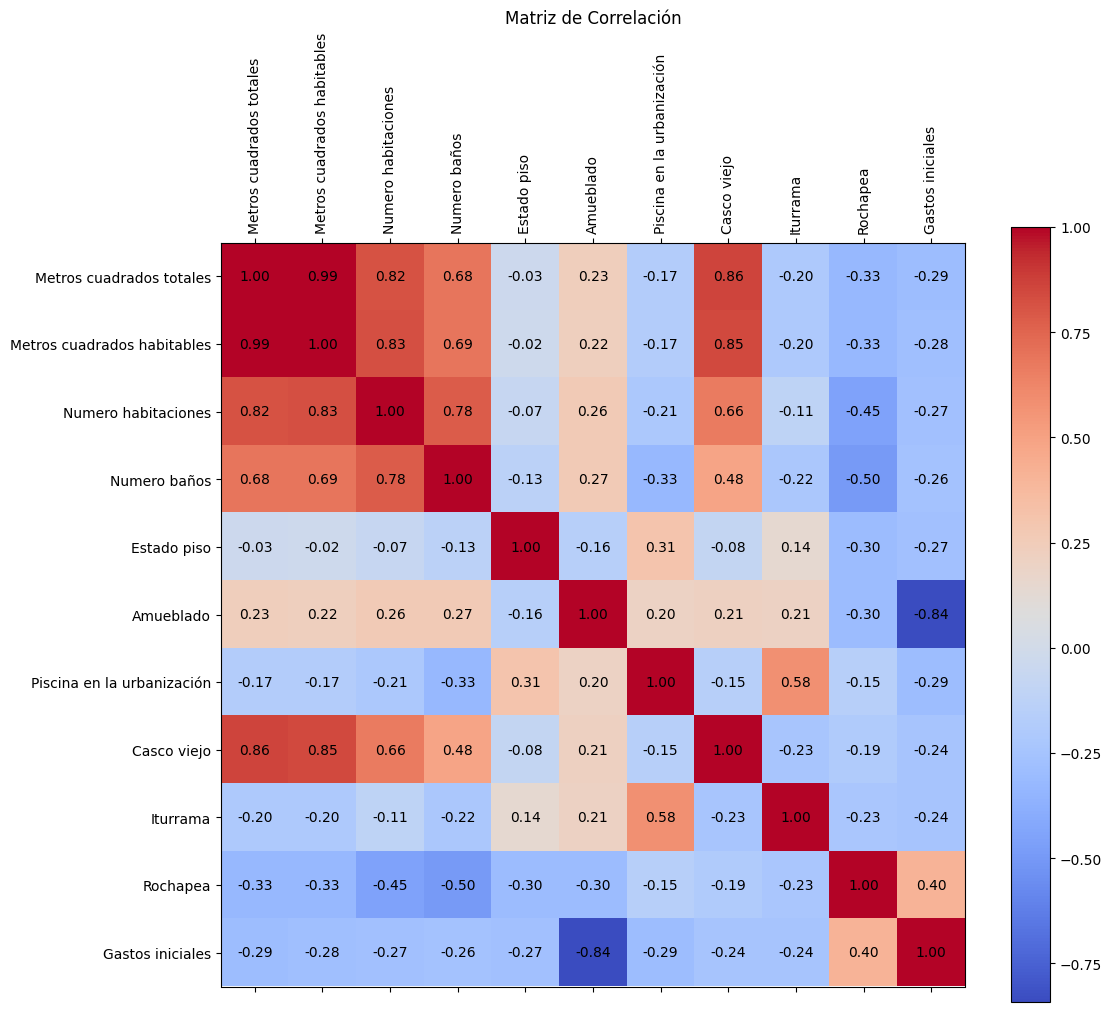

In [10]:
# Calcular la matriz de correlación
correlation_matrix = filtered_data.corr()

plt.figure(figsize=(12, 10))

# Crear la matriz de correlación
plt.matshow(correlation_matrix, cmap='coolwarm', fignum=1)
plt.colorbar()
plt.title("Matriz de Correlación")

# Añadir los valores de correlación como texto en cada celda
for i in range(correlation_matrix.shape[0]):
    for j in range(correlation_matrix.shape[1]):
        plt.text(j, i, "{:.2f}".format(correlation_matrix.iloc[i, j]),
                 ha='center', va='center', color='black')

plt.xticks(ticks=range(len(correlation_matrix.columns)), labels=correlation_matrix.columns, rotation=90)
plt.yticks(ticks=range(len(correlation_matrix.columns)), labels=correlation_matrix.columns)

plt.show()

In [11]:
dataset_filtrado = filtered_data.drop(['Metros cuadrados habitables', 'Numero habitaciones', 'Numero baños', 'Casco viejo'], axis=1)

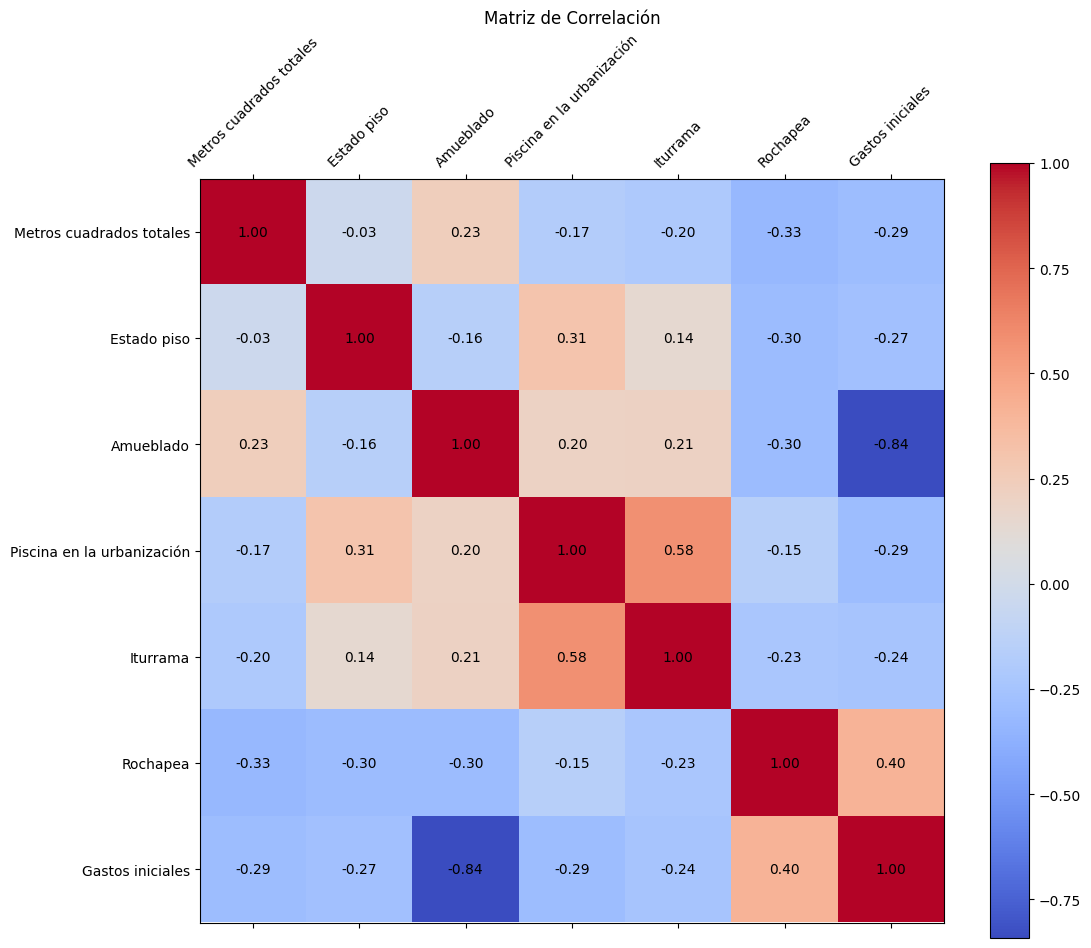

In [12]:
# Calcular la matriz de correlación
correlation_matrix = dataset_filtrado.corr()

plt.figure(figsize=(12, 10))

# Crear la matriz de correlación
plt.matshow(correlation_matrix, cmap='coolwarm', fignum=1)
plt.colorbar()
plt.title("Matriz de Correlación")

# Añadir los valores de correlación como texto en cada celda
for i in range(correlation_matrix.shape[0]):
    for j in range(correlation_matrix.shape[1]):
        plt.text(j, i, "{:.2f}".format(correlation_matrix.iloc[i, j]),
                 ha='center', va='center', color='black')

plt.xticks(ticks=range(len(correlation_matrix.columns)), labels=correlation_matrix.columns, rotation=45)
plt.yticks(ticks=range(len(correlation_matrix.columns)), labels=correlation_matrix.columns)

plt.show()

In [13]:
filtr = dataset_num[dataset_filtrado.columns]

filtr.info()

<class 'pandas.core.frame.DataFrame'>
Index: 180 entries, 1 to 180
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Metros cuadrados totales    180 non-null    float64
 1   Estado piso                 180 non-null    int64  
 2   Amueblado                   180 non-null    int64  
 3   Piscina en la urbanización  180 non-null    int64  
 4   Iturrama                    180 non-null    int64  
 5   Rochapea                    180 non-null    int64  
 6   Gastos iniciales            180 non-null    int64  
dtypes: float64(1), int64(6)
memory usage: 11.2 KB


In [14]:
df1 = filtr.select_dtypes(exclude='int64')

df2 = filtr.select_dtypes(include='int64').drop(columns='Gastos iniciales')

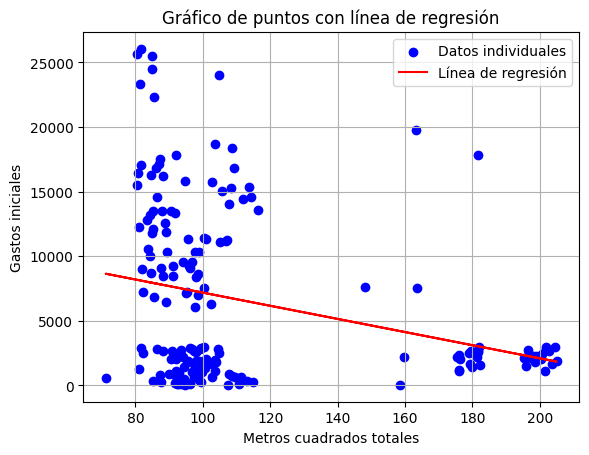

In [15]:
from sklearn.linear_model import LinearRegression

for i in df1.columns:
    # Seleccionar las dos columnas que deseas graficar
    x = dataset_num[i].values.reshape(-1, 1)
    y = dataset_num['Gastos iniciales'].values

    # Crear el modelo de regresión lineal
    regression = LinearRegression()
    regression.fit(x, y)

    # Predecir los valores de Y utilizando el modelo entrenado
    y_pred = regression.predict(x)

    # Crear la gráfica
    plt.scatter(x, y, color='blue',label='Datos individuales')  # Dibujar los puntos individuales
    plt.plot(x, y_pred, color='red', label='Línea de regresión')  # Dibujar la línea de regresión
    plt.title('Gráfico de puntos con línea de regresión')
    plt.xlabel(i)
    plt.ylabel('Gastos iniciales')
    plt.legend()  # Mostrar la leyenda
    plt.grid(True)  # Mostrar la cuadrícula en el gráfico
    plt.show()

c:\Users\Uned\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Uned\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Uned\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


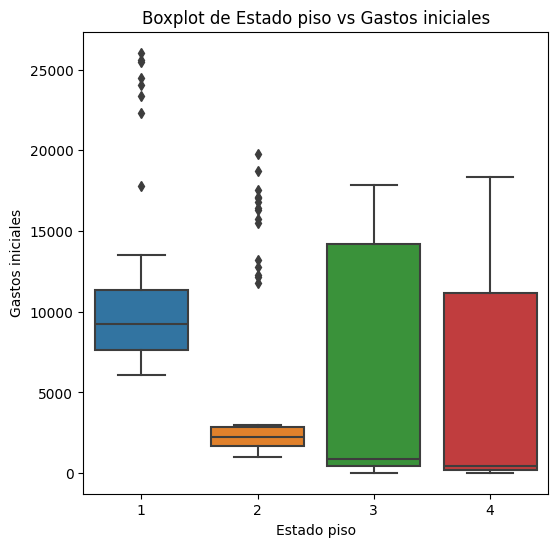

c:\Users\Uned\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Uned\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Uned\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


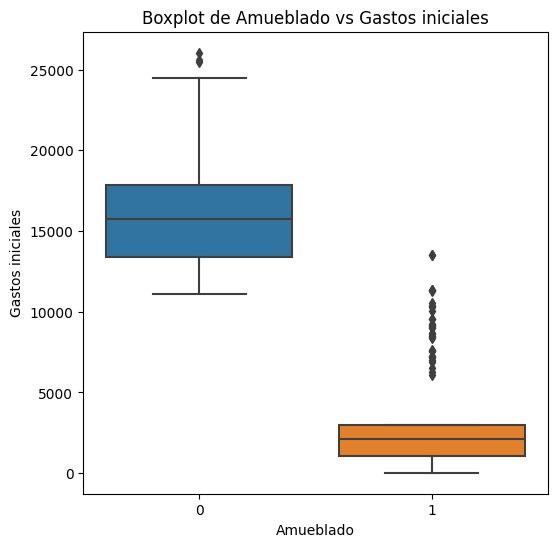

c:\Users\Uned\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Uned\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Uned\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


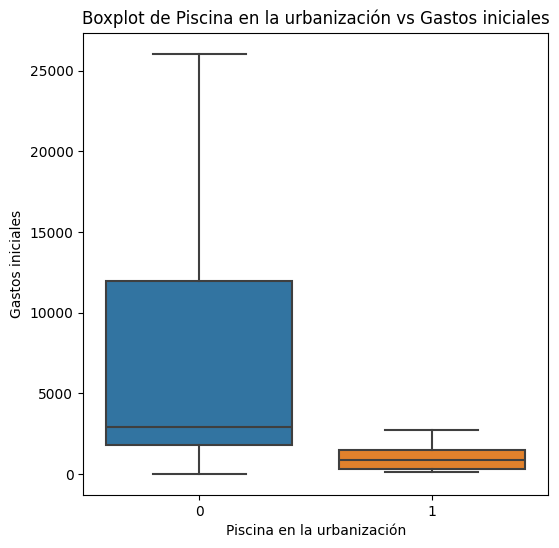

c:\Users\Uned\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Uned\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Uned\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


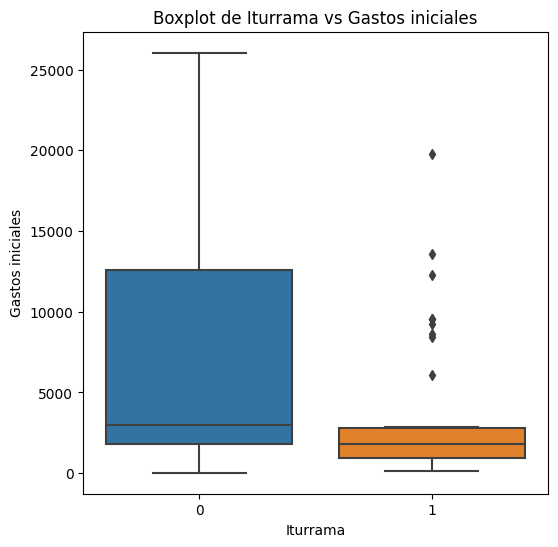

c:\Users\Uned\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Uned\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Uned\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


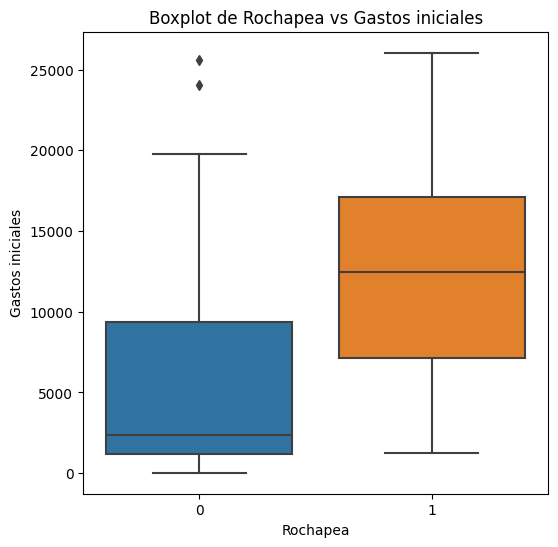

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Iterar sobre las columnas del DataFrame
for i in df2.columns:
    plt.figure(figsize=(6, 6))
    sns.boxplot(x=dataset_num[i], y=dataset_num['Gastos iniciales'])
    
    # Configurar la gráfica
    plt.title(f'Boxplot de {i} vs Gastos iniciales')
    plt.xlabel(i)
    plt.ylabel('Gastos iniciales')
    plt.show()

---
---

In [17]:
dir = '../data/v3.3_filtered_data'

dataset_filtrado.to_csv(dir+'.csv', index=True)
dataset_filtrado.to_excel(dir+'.xlsx', index=True)

---
---
# Modelo 3: Predicción gastos iniciales

In [18]:
dataset_filtrado.shape

(180, 7)

In [19]:
dataset_filtrado.head(5)

,Metros cuadrados totales,Estado piso,Amueblado,Piscina en la urbanización,Iturrama,Rochapea,Gastos iniciales
ID,,,,,,,
1,-0.682643,2.028706,0.56024,-0.353553,1.870829,-0.429198,220
2,-1.115154,0.922139,0.56024,-0.353553,-0.534522,-0.429198,572
3,-0.228904,-0.184428,0.56024,-0.353553,-0.534522,-0.429198,2810
4,0.925344,-1.290994,0.56024,-0.353553,-0.534522,-0.429198,7630
5,-0.860423,-0.184428,-1.78495,-0.353553,-0.534522,2.329929,16440


In [20]:
x_dataset = dataset_filtrado.iloc[:,:-1]

In [21]:
y_dataset = dataset_filtrado.iloc[:,-1]

In [22]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_dataset, y_dataset, test_size=0.3, random_state=42)

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.1, random_state=42)

In [23]:
testing = pd.concat([x_test, y_test], axis=1)

In [24]:
testing.head(5)

,Metros cuadrados totales,Estado piso,Amueblado,Piscina en la urbanización,Iturrama,Rochapea,Gastos iniciales
ID,,,,,,,
20,1.745258,-0.184428,0.56024,-0.353553,-0.534522,-0.429198,2470
43,-0.449140,-1.290994,0.56024,-0.353553,-0.534522,-0.429198,9108
154,2.374125,-0.184428,0.56024,-0.353553,-0.534522,-0.429198,2620
79,1.806288,-0.184428,0.56024,-0.353553,-0.534522,-0.429198,2200
146,-0.488941,0.922139,0.56024,-0.353553,-0.534522,-0.429198,320


In [25]:
dir = '../data/testing_v3'

testing.to_excel(dir+'.xlsx', index=True)

In [26]:
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(113, 6)
(13, 6)
(54, 6)


In [27]:
from tensorflow import keras
from keras import regularizers

num_columnas = x_train.shape[1]

model_v1 = keras.Sequential([
    keras.layers.Dense(908, kernel_regularizer=regularizers.l2(0.01), activation='relu', input_shape=(num_columnas,)),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(908, kernel_regularizer=regularizers.l2(0.01), activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(908, kernel_regularizer=regularizers.l2(0.01), activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(908, kernel_regularizer=regularizers.l2(0.01), activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(908, kernel_regularizer=regularizers.l2(0.01), activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(908, kernel_regularizer=regularizers.l2(0.01), activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(1, activation='relu')  
])

model_v1.summary()

c:\Users\Uned\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 908)            │         6,356 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 908)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 908)            │       825,372 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 908)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 908)            │       825,372 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 908)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 908)            │       825,372 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 908)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 908)            │       825,372 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 908)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 908)            │       825,372 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 908)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │           909 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,134,125 (15.77 MB)

 Trainable params: 4,134,125 (15.77 MB)

 Non-trainable params: 0 (0.00 B)

In [28]:
model_v1.compile(optimizer='adam', loss='mean_squared_error')

history = model_v1.fit(x_train, y_train, epochs=2, batch_size=4, validation_data=(x_val, y_val))

Epoch 1/2
29/29 ━━━━━━━━━━━━━━━━━━━━ 4s 52ms/step - loss: 63000212.0000 - val_loss: 10086351.0000
Epoch 2/2
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - loss: 12929280.0000 - val_loss: 17349122.0000


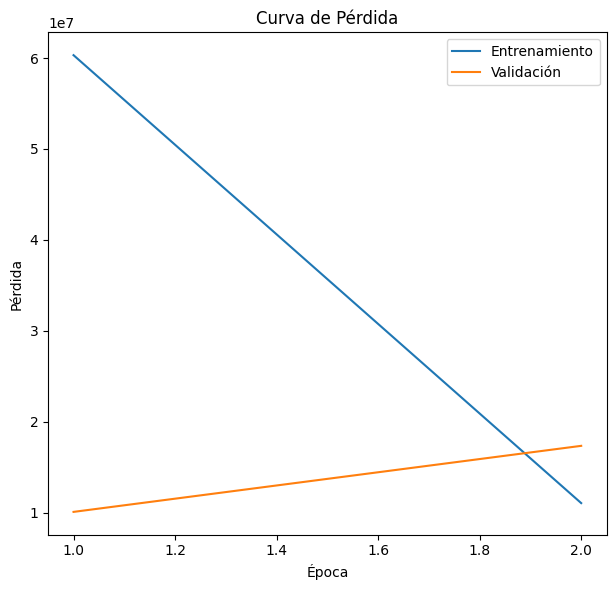

In [29]:
plt.figure(figsize=(12, 6))

# Curvas de pérdida
epochs = range(1, len(history.history['loss']) + 1)

plt.subplot(1, 2, 1)
plt.plot(epochs, history.history['loss'], label='Entrenamiento')
plt.plot(epochs, history.history['val_loss'], label='Validación')
plt.title('Curva de Pérdida')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.legend()

plt.tight_layout()
plt.show()

In [30]:
test_predict = model_v1.predict(x_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


In [31]:
ruta_archivo = 'models/model_gastos_iniciales.txt'

with open(ruta_archivo, 'r') as archivo:
    n = float(archivo.read().strip())

In [32]:
from sklearn.metrics import mean_squared_error, r2_score

rmse_test = np.sqrt(mean_squared_error(test_predict, y_test))
print("RMSE (prueba):", rmse_test)
r2_test = r2_score(test_predict, y_test)
print("R^2 (prueba):", r2_test)

RMSE (prueba): 2852.5105588185997
R^2 (prueba): 0.8778958916664124


In [33]:
if r2_test > n:
    model_v1.save('models/model_v3.h5')
    try:
        with open(ruta_archivo, 'w') as archivo:
            archivo.write(str(r2_test))
        print(f'El nuevo mejor valor es {r2_test} y ha sido escrito en el archivo {ruta_archivo}.')
    except IOError as e:
        print(f'Error al escribir en el archivo {ruta_archivo}: {e}')
else:
    print(f'El mejor valor sigue siendo {n}')

El mejor valor sigue siendo 0.9687487483024597


In [34]:
num_columnas = x_train.shape[1]

for i in range(10):    
    print(f"----------{i}----------")

    model_v1 = keras.Sequential([
        keras.layers.Dense(908, kernel_regularizer=regularizers.l2(0.01), activation='relu', input_shape=(num_columnas,)),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(908, kernel_regularizer=regularizers.l2(0.01), activation='relu'),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(908, kernel_regularizer=regularizers.l2(0.01), activation='relu'),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(908, kernel_regularizer=regularizers.l2(0.01), activation='relu'),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(908, kernel_regularizer=regularizers.l2(0.01), activation='relu'),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(908, kernel_regularizer=regularizers.l2(0.01), activation='relu'),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(1, activation='relu')  
    ])

    model_v1.compile(optimizer='adam', loss='mean_squared_error')

    history = model_v1.fit(x_train, y_train, epochs=2, batch_size=4, validation_data=(x_val, y_val))

    test_predict = model_v1.predict(x_test)

    ruta_archivo = 'models/model_gastos_iniciales.txt'

    with open(ruta_archivo, 'r') as archivo:
        n = float(archivo.read().strip())

    rmse_test = np.sqrt(mean_squared_error(test_predict, y_test))
    print("RMSE (prueba):", rmse_test)
    r2_test = r2_score(test_predict, y_test)
    print("R^2 (prueba):", r2_test)

    if r2_test > n:
        model_v1.save('models/model_v3.h5')
        try:
            with open(ruta_archivo, 'w') as archivo:
                archivo.write(str(r2_test))
            print(f'El nuevo mejor valor es {r2_test} y ha sido escrito en el archivo {ruta_archivo}.')
        except IOError as e:
            print(f'Error al escribir en el archivo {ruta_archivo}: {e}')
    else:
        print(f'El mejor valor sigue siendo {n}')

----------0----------
Epoch 1/2


c:\Users\Uned\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 4s 55ms/step - loss: 87083536.0000 - val_loss: 4204614.5000
Epoch 2/2
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 22017540.0000 - val_loss: 12169057.0000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
RMSE (prueba): 2656.0802084157035
R^2 (prueba): 0.8833484649658203
El mejor valor sigue siendo 0.9687487483024597
----------1----------
Epoch 1/2


c:\Users\Uned\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 4s 51ms/step - loss: 73319728.0000 - val_loss: 9293151.0000
Epoch 2/2
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 16730694.0000 - val_loss: 2766640.2500
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/stepWARNING:tensorflow:6 out of the last 6 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x000001C5A50D8860> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
RMSE (prueba): 

c:\Users\Uned\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 4s 49ms/step - loss: 93954864.0000 - val_loss: 2231778.0000
Epoch 2/2
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 9561482.0000 - val_loss: 776949.5625
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
RMSE (prueba): 1911.9507639310516
R^2 (prueba): 0.8636244535446167
El mejor valor sigue siendo 0.9687487483024597
----------3----------
Epoch 1/2


c:\Users\Uned\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 4s 55ms/step - loss: 85357712.0000 - val_loss: 19340134.0000
Epoch 2/2
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 60ms/step - loss: 22557940.0000 - val_loss: 7577985.0000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
RMSE (prueba): 1783.4952311662944
R^2 (prueba): 0.9331369996070862
El mejor valor sigue siendo 0.9687487483024597
----------4----------


c:\Users\Uned\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/2
29/29 ━━━━━━━━━━━━━━━━━━━━ 5s 61ms/step - loss: 87682424.0000 - val_loss: 17983570.0000
Epoch 2/2
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - loss: 26156230.0000 - val_loss: 4905943.5000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
RMSE (prueba): 1487.1564868638118
R^2 (prueba): 0.9474244117736816
El mejor valor sigue siendo 0.9687487483024597
----------5----------
Epoch 1/2


c:\Users\Uned\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 4s 52ms/step - loss: 73579744.0000 - val_loss: 3876550.5000
Epoch 2/2
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 17647758.0000 - val_loss: 2509863.5000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
RMSE (prueba): 2771.188032908454
R^2 (prueba): 0.6126625537872314
El mejor valor sigue siendo 0.9687487483024597
----------6----------
Epoch 1/2


c:\Users\Uned\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 4s 56ms/step - loss: 62942248.0000 - val_loss: 9371725.0000
Epoch 2/2
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - loss: 9877106.0000 - val_loss: 6196486.0000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
RMSE (prueba): 1539.0048511179546
R^2 (prueba): 0.9501163959503174
El mejor valor sigue siendo 0.9687487483024597
----------7----------
Epoch 1/2


c:\Users\Uned\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 4s 52ms/step - loss: 88964216.0000 - val_loss: 5884799.0000
Epoch 2/2
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 19282910.0000 - val_loss: 7189895.5000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
RMSE (prueba): 1793.269813942223
R^2 (prueba): 0.9318541884422302
El mejor valor sigue siendo 0.9687487483024597
----------8----------
Epoch 1/2


c:\Users\Uned\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 4s 54ms/step - loss: 66208152.0000 - val_loss: 8505553.0000
Epoch 2/2
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 21938656.0000 - val_loss: 22544184.0000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
RMSE (prueba): 3765.636323132344
R^2 (prueba): 0.8173317313194275
El mejor valor sigue siendo 0.9687487483024597
----------9----------
Epoch 1/2


c:\Users\Uned\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 4s 50ms/step - loss: 83193376.0000 - val_loss: 8117504.0000
Epoch 2/2
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 8759014.0000 - val_loss: 3098650.5000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
RMSE (prueba): 1336.8170722212458
R^2 (prueba): 0.9516076445579529
El mejor valor sigue siendo 0.9687487483024597
